# REGRESSION METRICS

<br>

## Introduction

<br>
An error metric is a type of metric used to measure the error of a forecasting model; they provide a way to quantitatively compare the performance of competing models. Some common error metrics for regression are :

<br>
<ul style="list-style-type:square">
    <li>
        mean absolute error (<b>MAE</b>)
    </li>
    <br>
    <li>
        mean squared error (<b>MSE</b>)
    </li>
    <br>
    <li>
        root mean square error (<b>RMSE</b>)
    </li>
    <br>
    <li>
        coefficient of determination (<b>R2</b>)
    </li>    

</ul>
    

In [1]:
# SETUP : importing

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.datasets import load_boston
import sklearn.linear_model as lm

import preprocessing as pre
import error_metrics as em

from pprint import pprint

In [2]:
# SETUP : reading in the datasets

#print(load_boston().DESCR)
data = np.column_stack( (load_boston().data, load_boston().target) )
df = pd.DataFrame(data)
df.columns = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#print('df.shape[0] : ', df.shape[0])

In [3]:
#df.describe()

In [4]:
target = 'MEDV'
if (isinstance(target, list)):
    features = [c for c in df.columns.values.tolist() if (c not in target)]
else:
    features = [c for c in df.columns.values.tolist() if (c != target)]

In [5]:
# DATA PREPROCESSING : features standardization

df_std = pre.standardize(df = df, included = features, excluded = target)
df = df_std

In [6]:
# GLOBAL PARAMETERS 

train_perc = 0.8
delimiter = int(len(df) * train_perc)
s = 1

print('train set size   : ', delimiter)
print('test  set size   : ', (len(df) - delimiter))
print()
print('seed : ', s)


train set size   :  404
test  set size   :  102

seed :  1


In [7]:
np.random.seed(s)
df_shuffled = df.reindex(np.random.permutation(df.index))    
    
train = df_shuffled[:delimiter]
test = df_shuffled[delimiter:]

model = lm.LinearRegression()
model.fit(train[features], train[target])

y_pred = model.predict(test[features])
metrics = em.compute_regression_metrics(y = test[target], y_pred = y_pred)


In [8]:
print('metrics')
print()
pprint(metrics)


metrics

{'ESS': 6764.5276694712356,
 'EVAR': 66.318898720306237,
 'FVU': 0.26486079152762737,
 'MSE': 23.201187482052148,
 'R2': 0.73513920847237268,
 'RSS': 2366.5211231693193,
 'TSS': 8934.96205882353,
 'TVAR': 87.59766724336794,
 'UVAR': 23.20118748205215}


In [9]:
feature = 'RM'

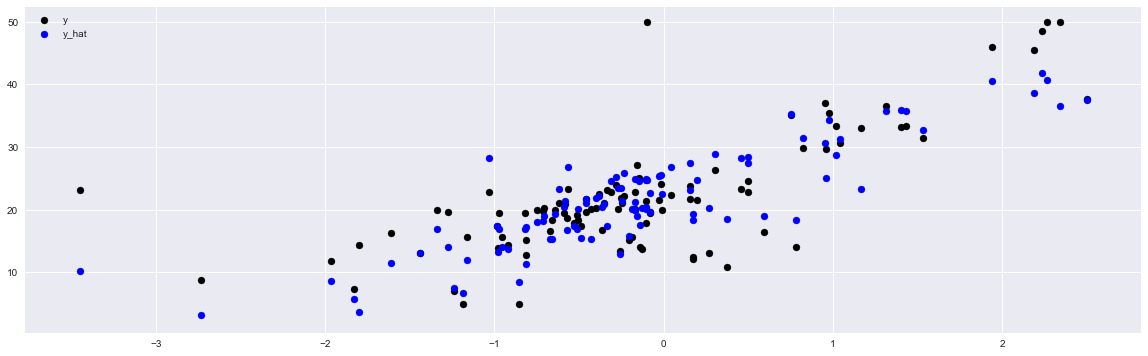

In [10]:
# REGRESSION PLOT

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')
ax.legend(loc = 'upper left')

plt.show()

## MAE : Mean Absolute Error

<br>
In statistics, the <b>mean absolute error (MAE) is a measure of difference between two continuous variables</b>. Formally :

<br>
$
    \quad
    \begin{align}
        MAE = \frac {1}{N} \sum _{i=1}^{n} \left| \boldsymbol{Y_i} - \hat{\mathbf{Y}}_\boldsymbol{i} \right| 
            = \frac {1}{N} \sum _{i=1}^{n} \left| \boldsymbol{e_i} \right| 
    \end{align}
$

<br>
The mean absolute error uses the same scale as the data being measured; <b>being a scale-dependent accuracy measure, it cannot be used to make comparisons between series using different scales</b>.

## MSE : Mean Squared Error

<br>
<b>The mean squared error (MSE)</b> or mean squared deviation (MSD) of an estimator <b>measures the average of the squares of the errors or deviations</b>; error or deviation being the difference between the estimator and what is estimated.

<br>
The MSE is a measure of the quality of an estimator, it is always non-negative, and values closer to zero are better :

<br>
$
    \quad
    \begin{align}
        MSE &= \frac {1}{N} \sum_{i=1}^{N} (\boldsymbol{\hat{Y}_i}- \boldsymbol{Y_i})^2
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        & \text{as a predictor} \quad [\textbf{E1-A}] 
        \newline
        MSE &= \mathbf{E} \big[ \ \big( \boldsymbol{\hat{\beta}}-\boldsymbol{\beta} \big)^2 \ \big]
        & \text{as an estimator} \quad [\textbf{E1-B}] 
    \end{align}
$

<br>
The denominator is the sample size reduced by the number of model parameters estimated from the same data, $(N-p)$ for $p$ regressors or $(N-p-1)$ if an intercept is used. 


<br>
<b>The MSE is the second moment (about the origin) of the error, and thus incorporates both the variance of the estimator and its bias</b>. The mean squared error can be written as the sum of the variance of the estimator and the squared bias of the estimator, providing a useful way to calculate the MSE and implying that, in the case of unbiased estimators, the MSE and variance are equivalent.

<br>
$
    \quad
    \begin{align}
        MSE
    &=
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad
        & \text{by definition}
    \newline
    &= \mathbf{E} \big[ \ \big( \boldsymbol{\hat{\beta}}-\boldsymbol{\beta} \big)^2 \ \big]
    \newline
    &=  
        \mathbf{E}
        \big[ \ \big(
                \boldsymbol{\hat{\beta}} - \mathbf{E} [\boldsymbol{\hat{\beta}}]
              + \mathbf{E} [\boldsymbol{\hat{\beta}}] + \boldsymbol{\beta} 
        \big)^{2} \ \big]
    \newline
    &= 
        \mathbf{E}
        \big[ \ 
            \big( \boldsymbol{\hat{\beta}} - \mathbf{E} [\boldsymbol{\hat{\beta}}] \big) ^2
            +2 \big( \boldsymbol{\hat{\beta}} - \mathbf{E} [\boldsymbol{\hat{\beta}}] \big)
               \big( \mathbf{E} [\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} \big)
            + \big( \mathbf{E} [\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} \big) ^2
        \ \big]
    \newline
    &= 
          \mathbf{E} \big[ \ \big(\boldsymbol{\hat{\beta}} - \mathbf{E} [\boldsymbol{\hat{\beta}}] \big) ^2 \ \big]
        + \mathbf{E} 
            \big[ \
                2 \big( \boldsymbol{\hat{\beta}} - \mathbf{E}[\boldsymbol{\hat{\beta}}] \big)
                  \big( \mathbf{E} [\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} \big)
            \ \big] 
        + \mathbf{E} \big[ \ \big( \mathbf{E}[\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} \big) ^2 \ \big]
        & \mathbf{E} [\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} = \text{const.}
    \newline \newline
    &= 
           \mathbf{E} \big[ \ \big( \boldsymbol{\hat{\beta}} - \mathbf{E}[\boldsymbol{\hat{\beta}}] \big) ^2 \ \big]
        +2  \big( \mathbf{E}[\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta}\big) 
            \mathbf{E} \big[ \boldsymbol{\hat{\beta}} - \mathbf{E}[\boldsymbol{\hat{\beta}}] \big]
        + \big( \mathbf{E}[\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta}\big) ^2
        & \mathbf{E} [\boldsymbol{\hat{\beta}}] = \text{const.}
    \newline
    &= 
        \mathbf{E} \big[ \ \big( \boldsymbol{\hat{\beta}} - \mathbf{E}[\boldsymbol{\hat{\beta}}] \big) ^2 \ \big]
        +2  \big( \mathbf{E}[\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} \big)
            \big( \mathbf{E}[\boldsymbol{\hat{\beta}}] - \mathbf{E}[\boldsymbol{\hat{\beta}}] \big)
        + \big( \mathbf{E}[\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} \big) ^2
    \newline
    &= 
          \mathbf{E} \big[ \ \big( \boldsymbol{\hat{\beta}} - \mathbf{E}[\boldsymbol{\hat{\beta}}] \big) ^2 \ \big]
        + \big( \mathbf{E}[\boldsymbol{\hat{\beta}}] - \boldsymbol{\beta} \big) ^2
    \newline \newline
    &= 
        \mathrm{Var}(\boldsymbol{\hat{\beta}}) + \mathrm{Bias}(\boldsymbol{\hat{\beta}},\boldsymbol{\beta}) ^2
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        & [\textbf{E2}] 
    \end{align}
$

<br>
In regression analysis, the term mean squared error is often used to refer to the unbiased estimate of error variance : the residual sum of squares divided by the number of degrees of freedom. This definition for a known, computed quantity differs from the above definition for the computed MSE of a predictor in that a different denominator is used. 

<br>
Note that, although the MSE (as defined in the current notebook) is not an unbiased estimator of the error variance, it is consistent, given the consistency of the predictor.

<br>
Unlike MAE, <b>MSE has the same units of measurement as the square of the quantity being estimated</b>. 

<br>
<b>It's also important to notice that large errors have a disproportionately large effect on MSE, since the contribution of each error on the statistic is proportional to the size of the square of the error itself. MSE is said to be sensitive to outliers.</b>

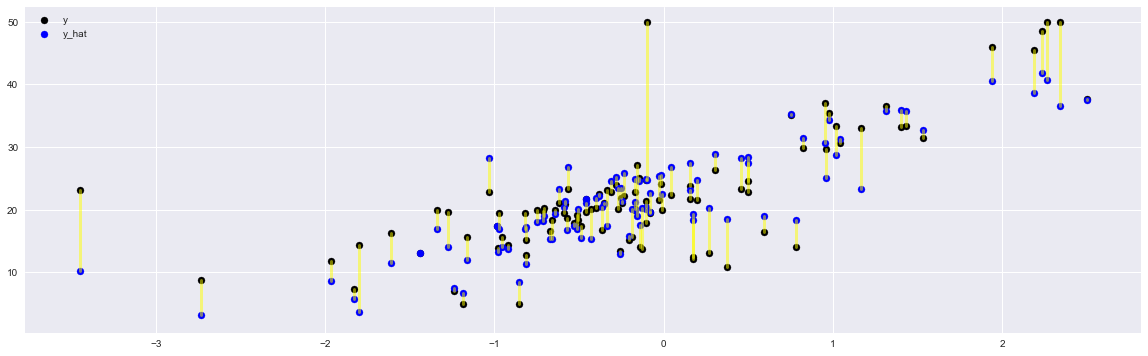

MSE :  23.2011874821


In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')
ax.legend(loc = 'upper left')

for pos in range(len(test[target])):
    x = test[feature].iloc[pos]
    y_min = min(test[target].iloc[pos], y_pred[pos])
    y_max = max(test[target].iloc[pos], y_pred[pos])
    ax.plot((x,x), (y_min,y_max), linestyle = 'solid', color = 'yellow', alpha = 0.5, linewidth = 3)

plt.show()

print('MSE : ', metrics['MSE'])


## RMSE

<br>
<b>The root mean square error (RMSE)</b>, or root mean square deviation (RMSD), <b>represents the sample standard deviation of the differences between predicted and observed values</b>. These individual differences are called residuals when the calculations are performed over the data sample that was used for the estimation, and prediction errors when computed out-of-sample. 

<br>
$
    \quad
    \begin{align}
        RMSE &= MSE^{ \ 1/2} = \sqrt{ \frac {1}{N} \sum_{i=1}^{N} (\boldsymbol{\hat{Y}_i}- \boldsymbol{Y_i})^2 }
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad
        & \text{when } MSE \text{ is a predictor} \quad [\textbf{E3-A}] 
        \newline \newline
        RMSE &= MSE^{ \ 1/2} = \sqrt{ \mathbf{E} \big[ \ \big( \boldsymbol{\hat{\beta}}-\boldsymbol{\beta} \big)^2 \ \big] }
        & \text{when } MSE \text{ is an estimator} \quad [\textbf{E3-B}] 
    \end{align}    
$

<br>
Being <b>RMSE</b> the square root of the average of squared errors, it <b>confounds information concerning average error with information concerning variation in the errors</b>. 

<br>
Furthermore, RMSE is sentitive to outliers, just like MSE.

## TSS : Total Sum of Squares

<br>
The total sum of squares is defined as the sum (over all observations) of the squared differences of each observation from the overall mean. Formally : 

<br>
$
    \quad
    \begin{align}
        TSS &= \sum _{i=1}^{N} (\boldsymbol{Y_i} - \boldsymbol{\overline{Y}})^2
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad 
        & [\textbf{E4}] 
    \end{align}
$

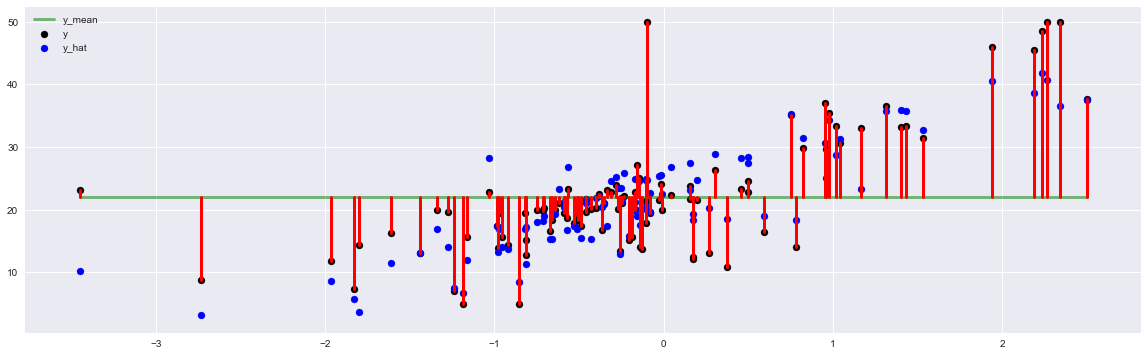

TSS    :  8934.96205882353


In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')
x_min = test[feature].min()
x_max = test[feature].max()
y_mean = test[target].mean()
ax.plot((x_min,x_max), (y_mean,y_mean), linestyle = 'solid', color = 'green', alpha = 0.5, linewidth = 3, label = 'y_mean')
ax.legend(loc = 'upper left')

for pos in range(len(test[target])):
    x = test[feature].iloc[pos]
    y_min = min(test[target].iloc[pos], y_mean)
    y_max = max(test[target].iloc[pos], y_mean)
    ax.plot((x,x), (y_min,y_max), linestyle = 'solid', color = 'red', linewidth = 3)
        
plt.show()

print('TSS    : ', metrics['TSS'])


## ESS : Explained Sum of Squares

<br>
The <b>explained sum of squares (ESS)</b>, also known as the <b>sum of squares due to regression</b>, is the sum of the squared deviations of the predicted values from the mean value of the response variable. Formally :

<br>
$
    \quad
    \begin{align}
        ESS &= 
            \sum _{i=1}^{N}(\boldsymbol{\hat{Y}_i} - \boldsymbol{\overline{Y}})^2
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad
            & [\textbf{E5}] 
    \end{align}
$

<br>
The ESS is a quantity used in describing how well a model represents the data being modelled. In particular, the explained sum of squares <b>measures how much variation there is in the fitted values</b> and this is compared to the total sum of squares (which measures how much variation there is in the observed data), and to the residual sum of squares (which measures the variation in the modelling errors).


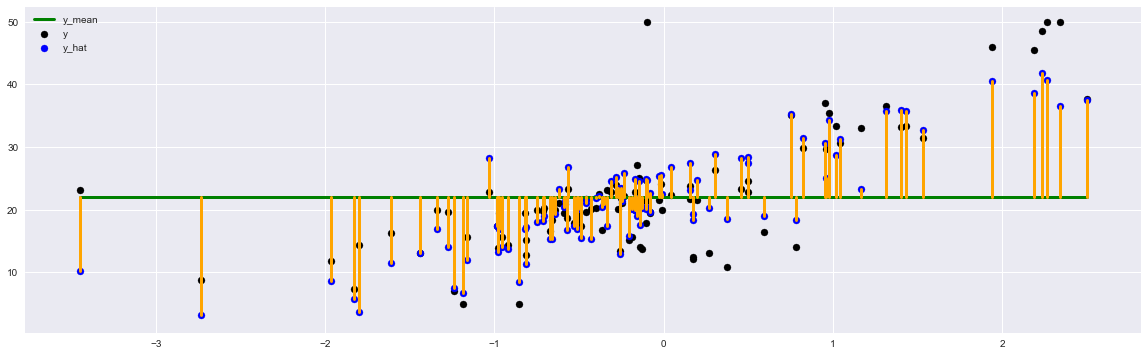

ESS    :  6764.52766947


In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')
x_min = test[feature].min()
x_max = test[feature].max()
y_mean = test[target].mean()
ax.plot((x_min,x_max), (y_mean,y_mean), linestyle = 'solid', color = 'green', linewidth = 3, label = 'y_mean')
ax.legend(loc = 'upper left')

for pos in range(len(test[target])):
    x = test[feature].iloc[pos]
    y_min = min(y_pred[pos], y_mean)
    y_max = max(y_pred[pos], y_mean)
    ax.plot((x,x), (y_min,y_max), linestyle = 'solid', color = 'orange', linewidth = 3)
        
plt.show()

print('ESS    : ', metrics['ESS'])


## RSS : Residual Sum of Squares

<br>
The <b>residual sum of squares (RSS)</b>, also known as the <b>sum of squared residuals (SSR)</b>, is the sum of the squared residuals :

<br>
$
    \quad
    \begin{align}
        RSS &= 
            \sum _{i=1}^{N} (\boldsymbol{e_i})^2 
            = \sum _{i=1}^{N}(\boldsymbol{Y_i} - \boldsymbol{X_i}^{\top} \boldsymbol{\hat{\beta}})^{2}
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            & [\textbf{E6-A}] 
    \end{align}
$

<br>
$
    \quad
    \begin{align}
        RSS &= 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            & \text{by definition}
        \newline
        &=
            \lVert \boldsymbol{e} \rVert ^2
            = \boldsymbol{e}^{\top} \boldsymbol{e} 
            & \mathbf{e} = \mathbf{M} \ \mathbf{Y} 
        \newline \newline
        &= 
            (\mathbf{M} \ \mathbf{Y} )^{\top}
            (\mathbf{M} \ \mathbf{Y} )            
        \newline
        &= 
            \mathbf{Y}^{\top} \mathbf{M}^{\top} \mathbf{M} \mathbf{Y}
            & \text{by simmetry of the } \mathbf{M} \text{ matrix}
        \newline
        &= 
            \mathbf{Y}^{\top} \mathbf{M} \mathbf{M} \mathbf{Y}
            & \text{by idempotency of the } \mathbf{M} \text{ matrix}
        \newline 
        &= 
            \mathbf{Y}^{\top} \mathbf{M} \mathbf{Y}
            & [\textbf{E6-B}] 
    \end{align}
$

<br>
The RSS is a measure of the discrepancy between the data and the estimation model; <b>a small RSS indicates a tight fit of the model to the data</b>. 

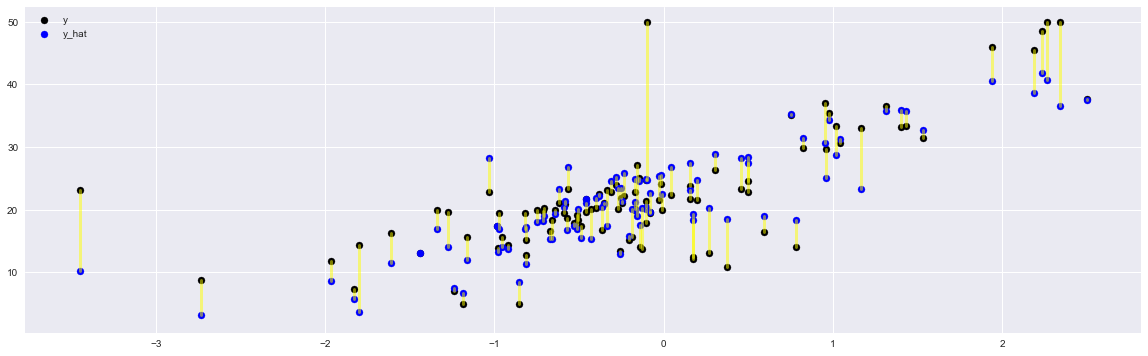

RSS    :  2366.5211231693193


In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')
ax.legend(loc = 'upper left')

for pos in range(len(test[target])):
    x = test[feature].iloc[pos]
    y_min = min(test[target].iloc[pos], y_pred[pos])
    y_max = max(test[target].iloc[pos], y_pred[pos])
    ax.plot((x,x), (y_min,y_max), linestyle = 'solid', color = 'yellow', alpha = 0.5, linewidth = 3)
        
plt.show()

print('RSS    : ', metrics['RSS'])


## Sum of Squares Partitioning

<br>
Mathematically, the sum of squared deviations is an unscaled (or unadjusted) measure of dispersion (also called variability); when scaled for the number of degrees of freedom, it estimates the variance (or spread) of the observations about their mean value. 

<br>
Scaling means adjusting the sum of squares so that it does not grow as the size of the data collection grows; this is important when we want to compare samples of different sizes. To scale the sum of squares, we divide it by the degrees of freedom , i.e. we calculate the sum of squares per degree of freedom (or variance). The standard deviation, in turn, is the square root of the variance.

<br>
<b>Partitioning the sum of squared deviations into various components allows the overall variability to be ascribed to different types or sources</b>, with the relative importance of each being quantified by the size of each component of the overall sum of squares.


### Partitioning in simple linear regression

<br>
In simple linear regression, is generally possible to partition the total sum of squares (TSS) as follows into the explained sum of squares (ESS) and the residual sum of squares (RSS) :

<br>
$
    \quad
    TSS = ESS + RSS
$

<br>
where this equation is equivalent to each of the following forms :

<br>
$
    \quad
    \begin{align}
        \lVert \mathbf{Y} - \overline{\mathbf{Y}} \rVert ^{2} 
        &= 
              \lVert \boldsymbol{\hat{Y}} - \overline{\mathbf{Y}} \rVert ^{2}  
            + \lVert \mathbf{Y} - \boldsymbol{\hat{Y}} \rVert ^{2}
        \newline \newline
        (\mathbf{Y} - \overline{\mathbf{Y}})^{\top} (\mathbf{Y} - \overline{\mathbf{Y}}) 
        &= 
            (\hat{\mathbf{Y}} - \overline{\mathbf{Y}})^{\top} (\hat{\mathbf{Y}} - \overline{\mathbf{Y}})
            + \mathbf{Y}^{\top} \mathbf{Y} 
            - \mathbf{Y}^{\top} \mathbf{X} (\mathbf{X}^{\top} \mathbf{X})^{-1} \mathbf{X}^{\top}\mathbf{Y}
        \newline \newline
        \sum _{i=1}^{N} (\boldsymbol{Y_i} - \overline{\mathbf{Y}})^{2}
        &=
              \sum _{i=1}^{N}(\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}})^{2}
            + \sum _{i=1}^{N}(\boldsymbol{Y_i} - \boldsymbol{\hat{Y}_i})^{2}
    \end{align}
$

### Proof

<br>
$
    \quad
    \begin{align}
        \sum _{i=1}^{N} (\boldsymbol{\mathbf{Y}_i} - \overline{\mathbf{Y}})^{2}
        &=
        \newline
        &=  \sum _{i=1}^{N} 
            (\boldsymbol{\mathbf{Y}_i} - \overline{\mathbf{Y}} + \boldsymbol{\hat{Y}_i} - \boldsymbol{\hat{Y}_i})^{2}
         \newline
         &=  \sum _{i=1}^{N} 
             \big[ 
                   (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}})
                 + (\boldsymbol{\mathbf{Y}_i} - \boldsymbol{\hat{Y}_i})
             \big]^{2}
        \newline
        &=
            \sum _{i=1}^{N}
            \big[
                  (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}})^{2}
                + 2 \ \boldsymbol{e_i} (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}})
                + \boldsymbol{e_i}^{2}
            \big]   
        \newline \newline
        &=
                \sum _{i=1}^{N} (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}})^{2}
            + \ \sum _{i=1}^{N} \boldsymbol{e_i}^{2}
            + \ 2 \sum _{i=1}^{N} \boldsymbol{e_i} (\boldsymbol{\hat{Y}_i}-\overline{\mathbf{Y}})
        \newline
        &=
                \sum _{i=1}^{N} (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}})^{2}
            + \ \sum _{i=1}^{N} \boldsymbol{e_i}^{2}
            + \ 2 
                \big[
                      \sum _{i=1}^{N} \boldsymbol{\hat{Y}_i} \boldsymbol{e_i}
                    - \overline{\mathbf{Y}} \sum _{i=1}^{N} \boldsymbol{e_i}
                \big]
            \qquad \qquad \qquad \qquad \qquad \quad
            & \text{by OLS intrinsic properties } \textbf{I2} \text{ and } \textbf{I5}
        \newline
        &=
              \sum _{i=1}^{N} (\boldsymbol{\hat{Y}_i}-\overline{\mathbf{Y}})^{2}
            + \ \sum _{i=1}^{N} \boldsymbol{e_i}^{2}
        \newline \newline
        &= ESS + RSS 
    \end{align}
$

<br>
The requirement that the model includes a constant, or equivalently that the design matrix contains a column of ones, ensures that $ \ \sum _{i=1}^{N} \boldsymbol{e_i} = 0 \ $.

<br>
It must be stressed that, <b>since this last property depends on the first OLS normal equation</b> (the equation associated to the intercept), <b>if our model does not include an intercept term then in general the decomposition obtained will not be fulfilled</b>.


### Partitioning in the General OLS model

Given a linear regression model containing $N$ observations of $p$ explanatory variables (the first of which is a constant unit vector whose coefficient is the regression intercept), the same partitioning can be obtained as long as the sum of residuals is zero.


<br>
$
    \quad
    \begin{align}
        TSS &= 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad & \text{by definition}
        \newline
        &= (\mathbf{Y} - \overline{\mathbf{Y}})^{\top} (\mathbf{Y} - \overline{\mathbf{Y}}) 
        \newline
        &= (\mathbf{Y}^{\top} - \overline{\mathbf{Y}}^{\top}) (\mathbf{Y} - \overline{\mathbf{Y}}) 
        \newline
        &=
            \mathbf{Y}^{\top} \mathbf{Y} - \mathbf{Y}^{\top} \overline{\mathbf{Y}}
            - \overline{\mathbf{Y}}^{\top} \mathbf{Y} + \overline{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}
        \newline
        &=
            \mathbf{Y}^{\top} \mathbf{Y} 
            - 2 \ \mathbf{Y}^{\top} \overline{\mathbf{Y}} 
            + \overline{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}
            & [\textbf{E7-A}] 
    \end{align}
$

<br>
$
    \quad
    \begin{align}
        ESS &= 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad & \text{by definition}
        \newline
        &= (\hat{\mathbf{Y}} - \overline{\mathbf{Y}})^{\top} (\hat{\mathbf{Y}} - \overline{\mathbf{Y}})
        \newline
        &= (\hat{\mathbf{Y}}^{\top} - \overline{\mathbf{Y}}^{\top}) (\hat{\mathbf{Y}} - \overline{\mathbf{Y}})
        \newline
        &= 
            \hat{\mathbf{Y}}^{\top} \hat{\mathbf{Y}} - \hat{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}
            - \overline{\mathbf{Y}}^{\top} \hat{\mathbf{Y}} + \overline{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}
        \newline
        &=        
            \hat{\mathbf{Y}}^{\top} \hat{\mathbf{Y}} 
            - 2 \ \hat{\mathbf{Y}}^{\top} \overline{\mathbf{Y}} 
            + \overline{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}
            & [\textbf{E7-B}] 
    \end{align}
$

<br>
$
    \quad
    \begin{align}
        RSS &= 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            \qquad \qquad \qquad \qquad \qquad & \text{by definition}
        \newline
        &= \boldsymbol{e}^{\top} \boldsymbol{e} 
            = 
            (\mathbf{Y} - \mathbf{X} \hat{\boldsymbol{\beta}}_\boldsymbol{OLS})^{\top}
            (\mathbf{Y} - \mathbf{X} \hat{\boldsymbol{\beta}}_\boldsymbol{OLS})
            & \hat{\boldsymbol{\beta}}_\boldsymbol{OLS} = (\mathbf{X}^{\top}\mathbf{X})^{-1} \mathbf{X}^{\top}\mathbf{Y}
        \newline
        &=
            \big[\mathbf{Y} - \mathbf{X} \big(\mathbf{X}^{\top} \mathbf{X}\big)^{-1}\mathbf{X}^{\top}\mathbf{Y}\big]^{\top}
            \big[\mathbf{Y} - \mathbf{X} \big(\mathbf{X}^{\top} \mathbf{X}\big)^{-1}\mathbf{X}^{\top}\mathbf{Y}\big]
            & \text{by definition of the hat matrix } \mathbf{H} 
        \newline \newline
        &= \big[\mathbf{Y} - \mathbf{H}\mathbf{Y}\big]^{\top} \big[\mathbf{Y} - \mathbf{H}\mathbf{Y}\big]
        \newline
        &= \big[\mathbf{Y}^{\top} - \mathbf{Y}^{\top}\mathbf{H}^{\top}\big] \big[\mathbf{Y} - \mathbf{H}\mathbf{Y}\big]
            & \text{by simmetry of the hat matrix } \mathbf{H} 
        \newline
        &= \big[\mathbf{Y}^{\top} - \mathbf{Y}^{\top}\mathbf{H}\big] \big[\mathbf{Y} - \mathbf{H}\mathbf{Y}\big]
        \newline
        &= 
            \mathbf{Y}^{\top} \mathbf{Y}
            - \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y}
            - \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y}
            + \mathbf{Y}^{\top} \mathbf{H} \mathbf{H}\mathbf{Y}
            & \text{by idempotency of the hat matrix } \mathbf{H} 
        \newline
        &= \mathbf{Y}^{\top} \mathbf{Y} - 2 \ \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y} + \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y} 
        \newline \newline
        &= 
            \mathbf{Y}^{\top} \mathbf{Y} - \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y}
        \newline
        &= 
            \mathbf{Y}^{\top} ( \mathbf{Y} - \mathbf{H} \mathbf{Y})
            & [\textbf{E7-C}] 
    \end{align}    
$

### Proof

<br>
$
    \quad
    \begin{align}
        \hat{\mathbf{Y}}^{\top}
        &= (\mathbf{H} \mathbf{Y})^{\top}
            = \mathbf{Y}^{\top} \mathbf{H}^{\top}
            = \mathbf{Y}^{\top} \mathbf{H}  
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad
            & [\textbf{E8-A}] 
        \newline \newline
        \hat{\mathbf{Y}}^{\top} \hat{\mathbf{Y}} 
        &= \mathbf{Y}^{\top} \mathbf{H}^{\top} \mathbf{H} \mathbf{Y}
        \newline
        &= \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y}      
        \newline
        &=  \mathbf{Y}^{\top} \hat{\mathbf{Y}} 
            & [\textbf{E8-B}] 
    \end{align}
$


<br>
$
    \quad
    \begin{align}
        ESS + RSS &=
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad
            & \text{by } \textbf{E7-B} \text{ and } \textbf{E7-C}
        \newline
        &=
            \big[ 
                 \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y}  
                - 2 \ \hat{\mathbf{Y}}^{\top} \overline{\mathbf{Y}} 
                + \overline{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}
            \big]
            + \big[ \mathbf{Y}^{\top} \mathbf{Y} - \mathbf{Y}^{\top} \mathbf{H} \mathbf{Y} \big]
        \newline
        &=
            \mathbf{Y}^{\top} \mathbf{Y}
            - 2 \ \hat{\mathbf{Y}}^{\top} \overline{\mathbf{Y}} 
            + \overline{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}
        \newline \newline
        TSS &=            
                \mathbf{Y}^{\top} \mathbf{Y} 
                - 2 \ \mathbf{Y}^{\top} \overline{\mathbf{Y}} 
                + \overline{\mathbf{Y}}^{\top} \overline{\mathbf{Y}}                      
    \end{align}
$


<br>
It's easy to see that the sum ESS + RSS corresponds to the TSS only when $ \ \hat{\mathbf{Y}}^{\top} \overline{\mathbf{Y}} = \mathbf{Y}^{\top} \overline{\mathbf{Y}}  \ $ : <b>the condition is that the sum of the elements of $\mathbf{Y}$ equals the sum of the elements of $\hat{\mathbf{Y}}$, or equivalently that the sum of the residuals is zero</b>, which is a well-known intrinsic property of the OLS estimation methods (<b>I2</b>).

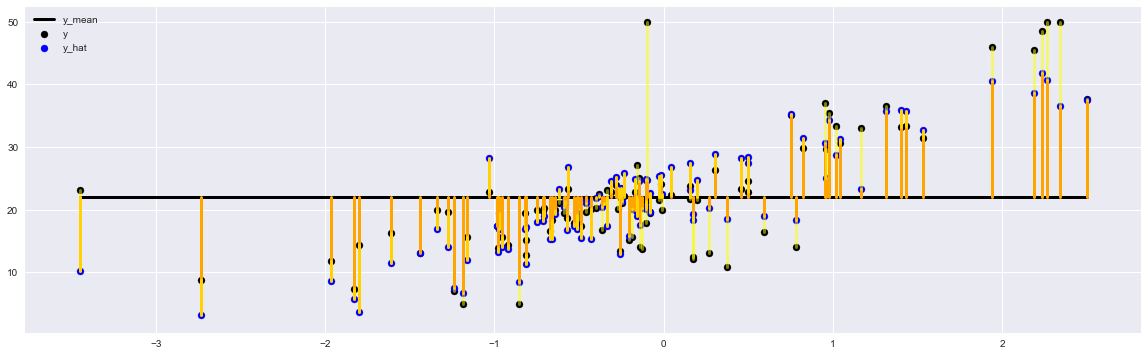

ESS              :  6764.52766947
RSS              :  2366.5211231693193
ESS + RSS        :  9131.04879264
TSS              :  8934.96205882353


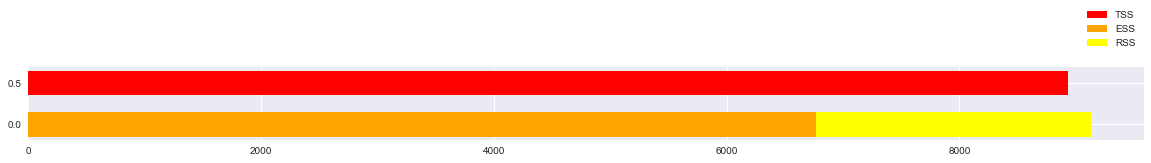

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')

x_min = test[feature].min()
x_max = test[feature].max()
y_mean = test[target].mean()
ax.plot((x_min,x_max), (y_mean,y_mean), linestyle = 'solid', color = 'black', linewidth = 3, label = 'y_mean')
ax.legend(loc = 'upper left')

for pos in range(len(test[target])):
    x = test[feature].iloc[pos]
    
    y_min = min(y_pred[pos], y_mean)
    y_max = max(y_pred[pos], y_mean)
    ax.plot((x,x), (y_min,y_max), linestyle = 'solid', color = 'orange', linewidth = 3)
    
    y_min = min(test[target].iloc[pos], y_pred[pos])
    y_max = max(test[target].iloc[pos], y_pred[pos])
    ax.plot((x,x), (y_min,y_max), linestyle = 'solid', color = 'yellow', alpha = 0.5, linewidth = 3)
        
plt.show()

print('ESS              : ', metrics['ESS'])
print('RSS              : ', metrics['RSS'])
print('ESS + RSS        : ', metrics['ESS'] + metrics['RSS'])
print('TSS              : ', metrics['TSS'])
#print('-2(y*y_mean)     : ', -2 * np.dot(test[target], y_mean))
#print('+2(y_hat*y_mean) : ', +2 * np.dot(y_pred, y_mean))
#partition_sum = metrics_test['ESS'] + metrics_test['RSS'] - 2 * np.dot(test[target], y_mean) + 2 * np.dot(y_pred, y_mean)
#print('ESS + RSS -2(y*y_mean) +2(y_hat*y_mean) : ', partition_sum)

num_bars = 2
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, num_bars*(2/3)))
y_ticks_centers = np.arange(num_bars) / 2
ax.barh(bottom = y_ticks_centers[1], width = metrics['TSS'], height = 0.3, color='red', label = 'TSS')
ax.barh(bottom = y_ticks_centers[0], width = metrics['ESS'], height = 0.3, color='orange', label = 'ESS')
ax.barh(bottom = y_ticks_centers[0], width = metrics['RSS'], height = 0.3, left = metrics['ESS'], color='yellow', label = 'RSS')
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.9),  shadow = True, ncol = 1)
plt.show()


## Explained and Unexplained Variance

<br>
In statistics, variance is a measure of statistical dispersion; formally, <b>the variance of a random variable is the expected value of the squared deviation of the variable itself from the mean</b> :

<br>
$
    \quad
    \begin{align}
        \operatorname{Var} (\mathbf{X}) 
        &= 
        \newline
        &= \operatorname{E} \left[ (\mathbf{X} - \operatorname{E}[\mathbf{X}])^2 \right]
        \newline
        &=  \operatorname{E} 
            \left[\mathbf{X}^2 - 2 \mathbf{X} \operatorname{E}[\mathbf{X}] + \operatorname{E}[\mathbf{X}]^2 \right]
        \newline
        &=  \operatorname{E} \big[\mathbf{X}^2\big] 
            - 2 \operatorname {E} \big[\mathbf{X}\big] \operatorname {E} \big[\mathbf{X}\big]
            + \operatorname{E} \big[\mathbf{X}\big]^2
        \newline
        &= \operatorname{E} \big[\mathbf{X}^2\big] + \operatorname{E} \big[\mathbf{X}\big]^2
    \end{align}
$




### Population vs Sample

<br>
When dealing with statistical data, it is important to distinguish between population and sample data sets. 

<br>
The population is the set representing the entirety of subjects (or entities) under study. Typically it's impossible to measure the entire population because not all members are observable or, if it's possible to enumerate the population, it would be costly in terms of time and/or other resources.

<br>
However, in statistics we are usually presented with a subset of the population called a sample, from which we wish to generalize to (or draw inferences about) a population. Thus <b>we could measure the parameter of interest in a sample of the population, which we call a statistic, and use this estimate to draw inferences about the same parameter in the population</b>. It is an inference because there will be some uncertainty and inaccuracy involved in drawing conclusions about the population based upon a sample. 

<br>
For instance, if all we have is a sample, but we wish to make a statement about the population standard deviation from which the sample is drawn, we need to use the sample standard deviation. Confusion can often arise as to which standard deviation to use due to the name "sample" standard deviation incorrectly being interpreted as meaning the standard deviation of the sample itself and not the estimate of the population standard deviation based on the sample.

<br>
There are many ways to select a sample and the study of this is called sampling theory. A commonly used method is Simple Random Sampling (SRS). In SRS each member of the population has an equal probability of being included in the sample, hence the term "random". There are many other sampling methods e.g. stratified sampling, cluster sampling, etc which all have their advantages and disadvantages.

<br>
It is important to remember that <b>the sample we draw from the population</b> (or that we are presented with) <b>is only one from a large number of potential samples</b>. The statistic we compute from the sample varies from sample to sample, and it has a <b>sampling distribution</b>. We can use this distribution to understand the uncertainty in our estimate of the population parameter.


### Sample Variance

<br>
The simplest estimators for the population mean and variance are the sample mean and the (uncorrected) sample variance, these two values are consistent estimators (they converge to the correct value as the number of samples increases); estimating the population variance by taking the sample variance is also close to optimal in general, but can be improved. 

<br>
<b>The (uncorrected) sample variance is computed as an average of squared deviations from the sample mean</b>, dividing by the number of observations (in the sample) $n$, <b>but this returns a biased estimator of the population variance</b>. 

<br>
Suppose the mean of the population is 2050, but the statistician does not know that, and must estimate it based on this small sample :

<br>
$
    \quad
    \begin{align}
        \operatorname{E_{\ population}}[\mathbf{X}] &= \quad 2050
        \newline
        \operatorname{E_{\ sample}}[\mathbf{X}] &= \quad \dfrac{1}{5} (2051 + 2053 + 2055 + 2050 + 2051) = 2052
    \end{align}
$


<br>
Now we face the problem of estimating the population variance; in the first case we suppose the actual value of the population mean is known, while in the second case we rely on the estimate of the population mean computed from the sample :

<br>
$
    \quad
    \begin{align}
        \operatorname{Var_{\ population}}
        &= \dfrac{1}{5} \ [(2051-2050)^2 + (2053-2050)^2 + (2055-2050)^2 + (2050-2050)^2 + (2051-2050)^2 ] = 7.2        
        \newline
        \operatorname{Var_{\ sample}}
        &= \dfrac{1}{5} \ [(2051-2052)^2 + (2053-2052)^2 + (2055-2052)^2 + (2050-2052)^2 + (2051-2052)^2 ] = 3.2            
    \end{align}
$

<br>
The second estimate returned a substantially smaller value, but why? It's importante to understand that, <b>being the sample mean the number that minimizes the sample variance, the estimate of the population variance that arises using the sample mean will always underestimate the sum of squared differences from the actual population mean</b>.


<br>
To see this in detail, we will now decompose each deviation from the (unknown) population mean into two parts : the deviation of an individual from the sample mean (<b>a</b>, which can be computed) and the additional deviation of the sample mean from the population mean (<b>b</b>, which cannot be computed).

<br>
$
    \quad
    \begin{align}
        \big[ \
            \underbrace{2053 - 2050}
            _{\begin{smallmatrix} \text{deviation from} \\  \text{the population} \\  \text{mean} \end{smallmatrix}}
        \ \big]^2 
        &= 
        \big[ \
            \overbrace{
                (
                    \underbrace{2053 - 2052}
                    _{\begin{smallmatrix} \text{deviation from} \\ \text{the sample mean} \end{smallmatrix}}
                )
            } ^{ \textbf{a} }
            + \overbrace{
                (
                    \underbrace{2052 - 2050}
                    _{\begin{smallmatrix} \text{additional deviation} \\ \text{from the pop. mean} \end{smallmatrix}}  
                )
              } ^{ \textbf{b} }
        \ \big]^2 
        \newline
        &= 
            \overbrace{(2053 - 2052)^2}^{ \boldsymbol{a^2} }
            + \overbrace{2 \ (2053 - 2052)(2052 - 2050)}^{ \boldsymbol{2ab} } 
            + \overbrace{(2052 - 2050)^2}^{ \boldsymbol{b^2} }
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            & [\textbf{E9}] 
    \end{align}
$


<br>
If we apply this to all the observations in the sample, we can observe certain patterns :

<br>
$
    \quad
    \begin{alignat}{3}
        & \overbrace{(2051-2052)^{2}} ^{ \boldsymbol{a^2} }
        & \quad + \quad \overbrace {2 \ (2051-2052)(2052-2050)} ^{ \boldsymbol{2ab} }
        & \quad + \quad \overbrace {(2052-2050)^{2}} ^{ \boldsymbol{b^2} } \\            
        & (2053-2052)^{2}
        & \quad + \quad 2 \ (2053-2052)(2052-2050) 
        & \quad + \quad (2052-2050)^{2}   \\         
        & (2055-2052)^{2}
        & \quad + \quad 2 \ (2055-2052)(2052-2050)
        & \quad + \quad (2052-2050)^{2}  \\          
        & (2050-2052)^{2}
        & \quad + \quad 2 \ (2050-2052)(2052-2050)
        & \quad + \quad (2052-2050)^{2}  \\          
        & (2051-2052)^{2}
        & \quad + \quad \underbrace{2 \ (2051-2052)(2052-2050)}
            _{
                \begin{smallmatrix}
                    { \text{the sum of the entries in this} } \\
                    { \text{middle column must be 0} }
                \end{smallmatrix}
            }
        & \quad + \quad (2052-2050)^{2}                
    \end{alignat}
$

<br>
The sum of the entries in the middle column must be zero because the sum of the deviations from the sample average must be zero. When the middle column has vanished, we can observe that :

<br>
<ul style="list-style-type:square">
    <li>
        the sum of the entries in the first column ($\boldsymbol{a^2}$) is the sum of the squares of the deviations from the
        sample mean
    </li>
    <br>
    <li>
        the sum of all of the entries in the two columns ($\boldsymbol{a^2}$ and $\boldsymbol{b^2}$) is the sum of squared 
        deviations from the population mean, because of the decomposition in <b>E9</b> and the disappearance of the central
        column ($\textbf{2ab}$)
    </li>
    <br>
    <li>
        the sum of all the entries must be bigger than the sum of the entries in the first column, since all the entries that
        have not vanished are positive (except when the population mean is the same as the sample mean, in which case all of the
        numbers in the last column will be 0)
    </li>
</ul>

<br>
In conclusion, <b>the sum of squared deviations from the sample mean</b> (and accordingly the variance computed using the sample mean) <b>will always underestimate the sum of squared deviations from the population mean</b> (and accordingly the true population variance), <b>except when the two values of the mean are the same</b>, in which case the sum of squared deviations and the variances are equal.

<br>
Using denominators other than $n$ improves the estimator in various ways. Four common values for the denominator are $n$, $n − 1$, $n + 1$, and $n − 1.5$; the number of sample observations $n$ lead to the simplest estimators, $n − 1$ eliminates bias, $n + 1$ minimizes mean squared error for the normal distribution, and $n − 1.$5 mostly eliminates bias in unbiased estimation of standard deviation for the normal distribution.

### Bessel's correction

<br>
The Bessel's correction is the use of the denominator $n − 1$ instead of $n$ in the formula for the sample variance and sample standard deviation, where $n$ is the number of observations in a sample.

<br>
$
    \quad
    \begin{align}
        \boldsymbol{\sigma^2}_\boldsymbol{n} 
        &= \frac {1}{n} \sum_{i=1}^n (\boldsymbol{X_i} - \overline{\mathbf{X}})^2 
            = \frac{\sum_{i=1}^n (\boldsymbol{X_i}^2)}{n} - \frac{(\sum_{i=1}^n \boldsymbol{X_i})^2}{n^2}
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad 
            & \text{uncorrected sample variance} \quad [\textbf{E10-A}] 
        \newline
        \boldsymbol{\sigma^2} 
        &= \frac {1}{n-1} \sum_{i=1}^n (\boldsymbol{X_i} - \overline{\mathbf{X}})^2 
            = \frac{\sum_{i=1}^n (\boldsymbol{X_i}^2)}{n-1} - \frac{(\sum_{i=1}^n \boldsymbol{X_i})^2}{(n-1) \ n} 
            = \bigg( \frac{n}{n-1} \bigg) \ \boldsymbol{\sigma^2}_\boldsymbol{n} 
            & \text{corrected sample variance} \quad \ [\textbf{E10-B}] 
        \newline        
    \end{align}
$

where $\quad \overline{\mathbf{X}} = \dfrac{1}{n} \sum_{i=1}^n \boldsymbol{X_i} \quad $ is the sample mean.


<br>
This method corrects the bias in the estimation of the population variance; it also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations.

<br>
One can understand Bessel's correction as the degrees of freedom in the residuals vector of the variable in question; while there are $n$ independent samples, there are only $n − 1$ independent residuals, as they sum to 0.

<br>
There are <b>three caveats to consider</b> regarding Bessel's correction:

<br>
<ul style="list-style-type:square">
    <li>
        <b>it does not yield an unbiased estimator of standard deviation</b> : while the (corrected) sample variance is an
        unbiased estimate of the population variance, its square root, the sample standard deviation, is a biased estimate of
        the population standard deviation. Being the square root is a concave function, the bias is downward. Although there is
        no general formula for an unbiased estimator of the population standard deviation, there are correction factors for
        particular distributions such as the normal
    </li>
    <br>
    <li>
        <b>the corrected estimator does not minimize MSE compared with biased estimators, and generally has worse MSE than
        the uncorrected estimator</b> : MSE can be minimized by using a different factor, the optimal value of which depends on
        excess kurtosis
    </li>
    <br>
    <li>
        <b>it is only necessary when the population mean is unknown, and we are using the sample mean to estimate the population
        mean or the population variance</b> : in this case there are $n$ degrees of freedom in a sample of $n$ points, and
        the simultaneous estimation of (population) mean and variance means that one degree of freedom goes to the sample mean
        and the remaining $n − 1$ degrees of freedom (the residuals) go to the sample variance. However, if the population mean
        is known, then the deviations of the samples from the population mean have $n$ degrees of freedom (in this case the mean
        is not being estimated, and the deviations are not residuals but errors) and Bessel's correction is not applicable
    </li>
</ul>


### Fraction of Variance Unexplained

<br>
In the context of a regression task, <b>the fraction of variance unexplained (FVU) is the fraction of variance of the dependent variable which cannot be explained</b> (i.e correctly predicted) <b>by the explanatory variables</b>. Formally :

<br>
$
    \quad
    \begin{align}
        FVU 
        \ &= \ \dfrac {UVAR} {TVAR} 
        \ =  \ \dfrac {RSS \ / \ n} {TSS \ / \ n} 
        \newline
        &= \ \dfrac {RSS} {TSS} 
             \quad \left(= 1 - \dfrac {ESS} {TSS} , \ \text{only true in some cases such as linear regression}\right)
        \newline
        &= 1 - \text{R}^{2}
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \ & [\textbf{E11-A}]
        \newline \newline
        FVU \ &= \ \dfrac{MSE}{TVAR} & [\textbf{E11-B}]
    \end{align}
$

where $\text{R}^{2}$ is called the <b>coefficient of determination</b>.

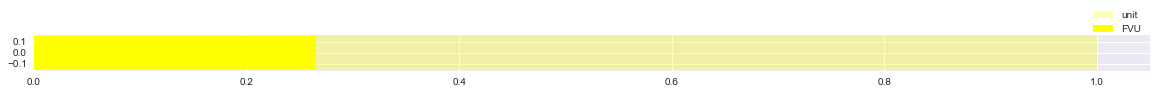

FVU :  0.2649


In [16]:
num_bars = 1
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, num_bars*(2/3)))
y_ticks_centers = np.arange(num_bars) / 2
ax.barh(bottom = y_ticks_centers[0], width = 1, height = 0.3, color='yellow', alpha = 0.3, label = 'unit')
ax.barh(bottom = y_ticks_centers[0], width = metrics['FVU'], height = 0.3, color='yellow', label = 'FVU')
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.9),  shadow = True, ncol = 1)
plt.show()

fvu = round(metrics['FVU'],4)
print('FVU : ', fvu)


### Explained Variance

<br>
Explained variance measures the proportion to which a mathematical model accounts for the variation of a given data set :

<br>
$
    \quad
    \begin{align}
    EVAR &= \dfrac{ESS}{n}
    \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad & [\textbf{E12}]
    \end{align}
$

### Partitioning in the General OLS model

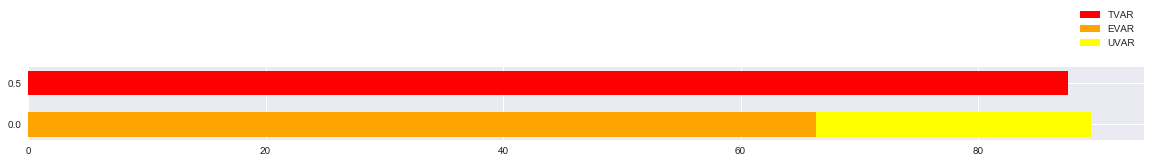

EVAR             : 66.3189   |   (ESS / n) : 66.3189
UVAR             : 23.2012   |   (RSS / n) : 23.2012
EVAR + UVAR      : 89.5201
TVAR             : 87.5977


In [17]:
num_bars = 2
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, num_bars*(2/3)))
y_ticks_centers = np.arange(num_bars) / 2
ax.barh(bottom = y_ticks_centers[1], width = metrics['TVAR'], height = 0.3, color='red', label = 'TVAR')
ax.barh(bottom = y_ticks_centers[0], width = metrics['EVAR'], height = 0.3, color='orange', label = 'EVAR')
ax.barh(bottom = y_ticks_centers[0], width = metrics['UVAR'], height = 0.3, left = metrics['EVAR'], color='yellow', label = 'UVAR')
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.9),  shadow = True, ncol = 1)
plt.show()

evar = round(metrics['EVAR'],4)
uvar = round(metrics['UVAR'],4)
tvar = round(metrics['TVAR'],4)
ess_n = round( (metrics['ESS']/len(test)), 4 )
rss_n = round( (metrics['RSS']/len(test)), 4 )

print('EVAR             : {0}   |   (ESS / n) : {1}'.format(evar, ess_n))
print('UVAR             : {0}   |   (RSS / n) : {1}'.format(uvar, rss_n))
print('EVAR + UVAR      : {0}'.format(evar + uvar))
print('TVAR             : {0}'.format(tvar))


## Coefficient of Determination

<br>
The coefficient of determination, denoted as <b>R<sup>2</sup></b>, is a statistical measure of how well the regression line approximates the real data points, based on the <b>proportion of the total variation in the dependent variable that can be explained by the model</b> (correctly predicted by the regressors).

<br>
$
    \quad
    \begin{align}
        \operatorname{\boldsymbol{R^2}} 
        &= 1- \dfrac {RSS} {TSS} = 1 - FVU 
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad
        & \text{general form} \quad [\textbf{E13-A}] 
        \newline
        &= \dfrac {ESS} {TSS}        
        & \text{when the sum of squares partitioning holds} \quad [\textbf{E13-B}] 
    \end{align}
$

<br>
In linear least squares regression with an estimated intercept term, R<sup>2</sup> equals the square of the Pearson correlation coefficient between the observed and the predicted values of the dependent variable. In a univariate linear least squares regression, this is also equal to the squared Pearson correlation coefficient between the dependent variable and the single explanatory variable.

<br>
Provided a linear model with more than one explanatory variable, the coefficient of determination represents the proportion of variability in the dependent variable that may be attributed to some linear combination of the regressors; it is a measure of the global fit of the model.


### Range of values

<br>
The coefficient of determination ranges <b>from 0 (no linear relationship between the response variable and the regressors, or a horizontal line explains the data equally as well as our model) to 1 (the regression line perfectly fits the data)</b>. 


<br>
<b>Negative values of R<sup>2</sup> may arise when the predictions that are being compared to the observed outcomes have not been derived from the same data, when linear regression is conducted without including an intercept, or whenever we are using the wrong model to describe (or predict) the data</b>. 

<br>
From the proof of partitioning in simple linear regression we know that, when our model is provided with an intercept, both the numerator and the demoninator are sums of squares, hence R<sup>2</sup> will be positive :

<br>
<blockquote>
$
    \begin{align*}
        & 
        \begin{aligned}[t]
            TSS &= ESS + RSS            
        \end{aligned}
        \newline \newline
        \Rightarrow \quad & TSS - RSS = ESS
        \newline
        \Rightarrow \quad & \operatorname{\boldsymbol{R^2}}  = 1 - \dfrac {RSS}{TSS} = \frac {ESS}{TSS} 
    \end{align*}
$
</blockquote>


<br>
But here is what happens when our model does not include an intercept term :

<br>
$
    \begin{align*}
        & 
        \begin{aligned}[t]
        TSS
        &=  ESS + RSS + 2 \ \sum _{i=1}^{N}
            \big[ (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}}) (\boldsymbol{\mathbf{Y}_i} - \boldsymbol{\hat{Y}_i}) \big]
        \newline
        &= ESS + RSS + 2 \ \sum _{i=1}^{N} \big[ (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}}) \ \boldsymbol{e_i} \big]
        \end{aligned}        
        \newline \newline
        \Rightarrow \quad 
        & TSS - RSS = ESS + 2 \ \sum _{i=1}^{N} \big[ (\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}}) \ \boldsymbol{e_i} \big]
        \newline
        \Rightarrow \quad 
        & 
            \operatorname{\boldsymbol{R^2}}  
            = 1 - \dfrac {RSS}{TSS} 
            = \dfrac 
                {ESS + 2 \ \sum _{i=1}^{N} \big[(\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}}) \ \boldsymbol{e_i} \big]} 
                {TSS}
    \end{align*}
$

<br>
The numerator now has a term in it which is not a sum of squares, so it can be negative. When would this happen? 

<br>
The coefficient of determination compares the fit of the chosen model with that of the null hypothesis (the horizontal  line $\overline{\mathbf{Y}}$); <b>if the chosen model actually fits worse than a horizontal line, then $(\boldsymbol{\hat{Y}_i} - \overline{\mathbf{Y}})$ and $\boldsymbol{e_i}$ may have opposite sign, thus leading to a negative R<sup>2</sup></b>.

<br>
In a linear regression model with no constraints, R<sup>2</sup> must be positive (or zero) and equal to the square of the correlation coefficient $r$. 


### Caveats

<br>
<b>Caveat # 1</b> : the correlation coefficient $r$ and the coefficient of determination r<sup>2</sup> quantify the strength of a <b>linear relationship</b>. It is possible that both statistics equal zero, suggesting there is no linear relation between the regressors and the dependent variable, and yet a non-linear relationship exists.


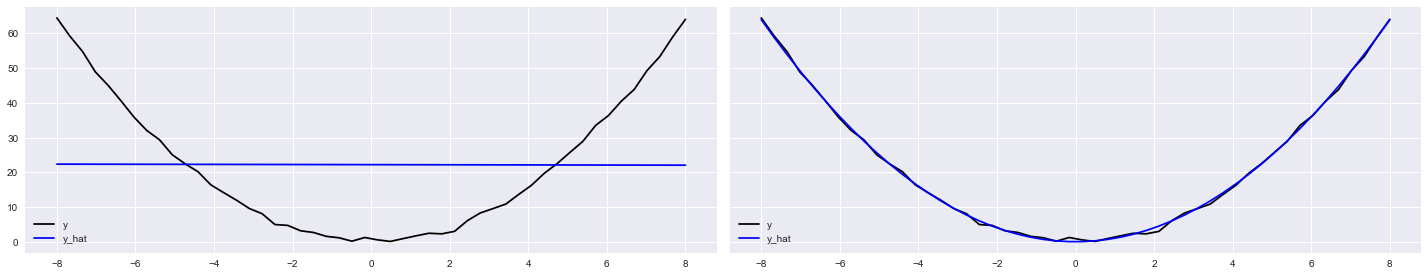


r  : pearson coefficient of correlation (linear regression)     :  -0.00444957304319
r2 : coefficient of determination       (linear regression)     :  1.97987002666e-05
R2 : coefficient of determination       (non-linear regression) :  0.999298765534


In [18]:
em.plot_r2_caveats(cmd = 'non_linear_relationship')

<br>
<b>Caveat # 2</b> : a caution that applies to R<sup>2</sup>, as to other statistical descriptions of correlation and association, is that <b>correlation does not imply causation</b>. In other words, while correlation may sometimes provide valuable clues in uncovering causal relationships among variables, a non-zero estimated correlation between two variables is not, on its own, evidence that changing the value of one variable would result in changes in the values of other variables.

<br>
<b>Caveat # 3</b> : <b>a large r<sup>2</sup> value should not be interpreted as meaning that the estimated regression line fits the data well</b>; another function might better describe the trend in the data. In the example below, the large value of $r$ (and consequently r<sup>2</sup>) suggest a strong linear relationship between the dependent and the independent variables. The plot shows, however, that a curve would describe the relationship even better. The large value of r<sup>2</sup> simply says that taking this particular regressor into account is better than not doing so (horizontal line). 


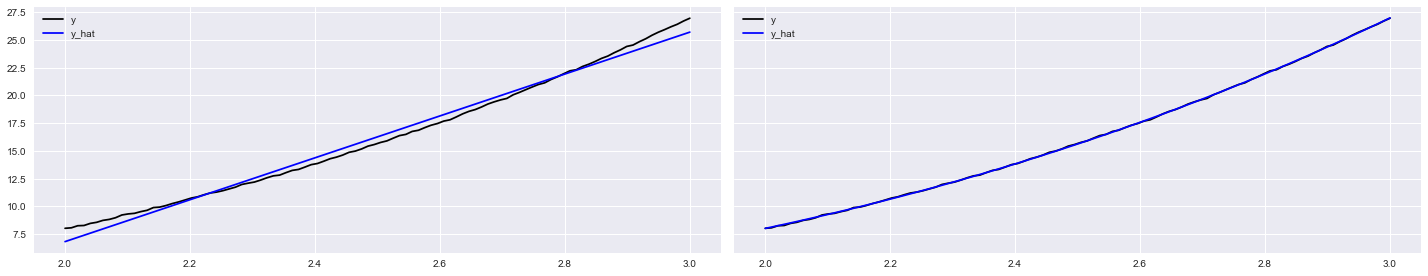


r  : pearson coefficient of correlation (linear regression)     :  0.994862725978
r2 : coefficient of determination       (linear regression)     :  0.98975184354
R2 : coefficient of determination       (non-linear regression) :  0.999933222784


In [19]:
em.plot_r2_caveats(cmd = 'large_r2_misinterpretation')

<br>
<b>Caveat # 4</b> : <b>the correlation coefficient $r$ and the coefficient of determination r<sup>2</sup> can both be greatly affected by just one (or a few) influential data point</b>. In the example below, if we had not plotted the data, we wouldn't notice that is only one particular data point that was responsible for such small values of the two statistics. In the second plot we removed the influential data point and regressed again.

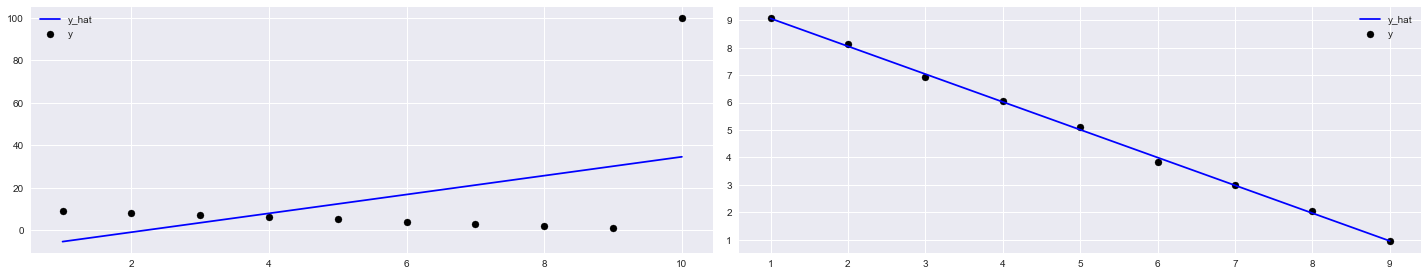

r  : pearson coefficient of correlation :                0.4463    r  :                                                 -0.9995
r2 : coefficient of determination       :                0.1992    r2 :                                                   0.999
R2 : coefficient of determination       :              -100.034    R2 :                                                 -3.0504


In [20]:
em.plot_r2_caveats(cmd = 'r2_influential_points')

<br>
<b>Caveat # 5</b> : <b>inflation of R<sup>2</sup></b>. In least squares regression, <b>the coefficient of determination weakly increases with the number of regressors in the model</b>. 

<br>
The intuitive reason that using an additional explanatory variable cannot lower the coefficient of determination is that minimizing the RSS is equivalent to maximizing R<sup>2</sup>. When the extra variable is included, the data always have the option of giving it an estimated coefficient of zero, leaving the predicted values and R<sup>2</sup> unchanged. When the optimization problem estimates a non-zero coefficient, it improves R<sup>2</sup>.

<br>
Since the coefficient of determination increases with the number of regressors, it cannot be used by itself as a meaningful comparison of models with very different numbers of independent variables.

<br>
<b>Caveat # 6</b> : <b>statistical significance does not imply practical significance</b>. In general, the larger the data set, the easier it is to reject the null hypothesis and claim statistical significance. If the data set is very large, it is possible to reject the null hypothesis and claim that the slope is not 0 even when it is not practically or meaningfully different from 0. In other words, it is possible to get a significant P-value when the slope coefficient is 0.13, a value that is likely not to be considered meaningfully different from 0. 

<br>
<b>Caveat # 7</b> : <b>a large r<sup>2</sup> value does not necessarily mean that a useful prediction of the response variable, or estimation of its mean, can be made. It is still possible to get prediction intervals or confidence intervals that are too wide to be useful.

### Limitations

<br>
In addition to the caveats described above, R<sup>2</sup> does not indicate whether:

<br>
<ul style="list-style-type:square">
    <li>
        the most appropriate set of independent variables has been chosen
    </li>
    <br>
    <li>
        the model might be improved by using transformed versions of the existing set of independent variables
    <li>
    <br>
    <li>
        omitted-variable bias exists
    </li>
    <br>
    <li>
        the explanatory variables are affected by collinearity 
    </li>
    <br>
    <li>
        there are enough data points to make a solid conclusion
    </li>
</ul>


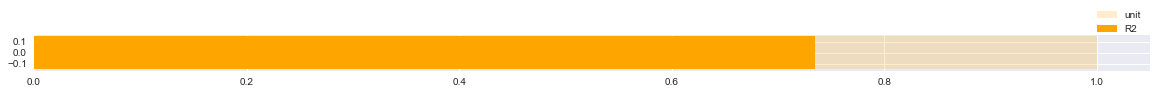

R2  : 0.7351


In [21]:
num_bars = 1
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, num_bars*(2/3)))
y_ticks_centers = np.arange(num_bars) / 2
ax.barh(bottom = y_ticks_centers[0], width = 1, height = 0.3, color='orange', alpha = 0.2, label = 'unit')
ax.barh(bottom = y_ticks_centers[0], width = 1 - metrics['FVU'], height = 0.3, color='orange', label = 'R2')
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.9),  shadow = True, ncol = 1)
plt.show()

print('R2  : {0}'.format(round(metrics['R2'],4)))

## Adjusted R2

<br>
Adjusted R2 is an attempt to take account of the phenomenon of R2 automatically and spuriously (due to chance) increasing when extra explanatory variables are added to the model. <b>It is a modification of R2 that adjusts for the number of explanatory terms in a model relative to the number of data points</b>. Formally :

<br>
$
    \quad
    \begin{align}
        \overline{\boldsymbol{R}}^{\boldsymbol{\ 2}} 
        &=  1 - (1-R^2) \dfrac{n - 1}{n - p} = R^2 - (1-R^2)\dfrac{p - 1}{n - p}
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad & [\textbf{E14-A}]
    \end{align}
$

The principle behind the adjusted R2 statistic can be seen by rewriting both the ordinary and the adjusted R2 in this alternative formulation :

<br>
$
    \quad
    \begin{align}
        \boldsymbol{R}^{\boldsymbol{\ 2}} &= 1 - \dfrac {RSS \ / \ n} {TSS \ / \ n}
        \newline \newline
        \overline{\boldsymbol{R}}^{\boldsymbol{\ 2}} &= 1 - \dfrac {RSS \ / \ \text{df}_e} {TSS \ / \ \text{df}_t}
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad & [\textbf{E14-B}]
    \end{align}
$

where and $n$ is the sample size, and $p$ is the total number of explanatory variables in the model (not including the constant term).

<br>
In ordinary R2, $RSS \ / \ n$ and $TSS \ / \ n$ are the sample variances of, respectively, the regression residuals and the dependent variable; these two values can be seen as biased estimates of the population variances of the errors and of the dependent variable. 

<br>
In adjusted R2 the mentioned estimates are replaced by statistically unbiased versions which take into account the concept of degrees of freedom : $\text{df}_e$ is the degrees of freedom ($n – p – 1$) of the estimated population variance of the error, and $\text{df}_t$ is the degrees of freedom ($n – 1$) of the estimated population variance of the dependent variable. 

<br>
<b>Adjusted R2 does not have the same interpretation as ordinary R2; while the former is a measure of fit, the latter is instead a comparative measure of suitability of alternative nested sets of explanators</b>. As such, care must be taken in interpreting and reporting this statistic. Adjusted R2 is particularly useful in the feature selection stage of model building.

<br>
If a set of explanatory variables with a predetermined hierarchy of importance are introduced into a regression one at a time, with adjusted R2 computed each time, the sequence of regressors for which the adjusted R2 reaches a maximum and decreases afterward, would be the subset of regressors having the best fit without unnecessary terms.


## References

<br>
<ul style="list-style-type:square">
    <li>
        Wikipedia - Mean Absolute Error <br>
        https://en.wikipedia.org/wiki/Mean_absolute_error
    </li>
    <br>
    <li>
        Wikipedia - Mean Squared Error <br>
        https://en.wikipedia.org/wiki/Mean_squared_error
    </li>
    <br>
    <li>
        Wikipedia - Total Sum of Squares <br>
        https://en.wikipedia.org/wiki/Total_sum_of_squares
    </li>
    <br>
    <li>
        Wikipedia - Explained Sum of Squares <br>
        https://en.wikipedia.org/wiki/Explained_sum_of_squares
    </li>
    <br>
    <li>
        Wikipedia - Residual Sum of Squares <br>
        https://en.wikipedia.org/wiki/Residual_sum_of_squares
    </li>
    <br>
    <li>
        Wikipedia - Partition of sums of squares <br>
        https://en.wikipedia.org/wiki/Partition_of_sums_of_squares
    </li>
    <br>
    <li>
        Aerd Statistics - Standard Deviation <br>
        https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php
    </li>
    <br>
    <li>
        StackExchange - Cross Validated - What is the difference between a population and a sample? <br>
        https://stats.stackexchange.com/questions/269/what-is-the-difference-between-a-population-and-a-sample
    </li>
    <br>
    <li>
        Wikipedia - Variance <br>
        https://en.wikipedia.org/wiki/Variance
    </li>
    <br>
    <li>
        Wikipedia - Bessel's correction <br>
        https://en.wikipedia.org/wiki/Bessel%27s_correction
    </li>
    <br>
    <li>
        Wikipedia - Fraction of Variance Unexplained <br>
        https://en.wikipedia.org/wiki/Fraction_of_variance_unexplained
    </li>  
    <br>
    <li>
        Wikipedia - Coefficient of determination <br>
        https://en.wikipedia.org/wiki/Coefficient_of_determination
    </li>
    <br>
    <li>
        StackExchange - CrossValidated - What does negative R-squared mean? <br>
        https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean
    </li>    
    <br>
    <li>
        StackExchange - CrossValidated - When is R squared negative? <br>
        https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative
    </li>
</ul>
